In [1]:
import os 
os.chdir("D:/Myprojects/CustomerChurnDetection")


In [21]:
#importing required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [28]:
#Data collection and Inspection
data  = pd.read_csv("Telco Customer-Churn.csv")
print(data.info())

#data preprocessing
print(data.isnull().sum())
targets = {
    'Yes':1,
    'No':0
}
data['Churn'].map(targets).astype('int')    
data['Total Charges'] = (
    pd.to_numeric(data['TotalCharges'], errors='coerce').fillna(0)
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\chara\AppData\Local\Temp\ipykernel_11508\2789346868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn',data=data,palette=['gray','green'])


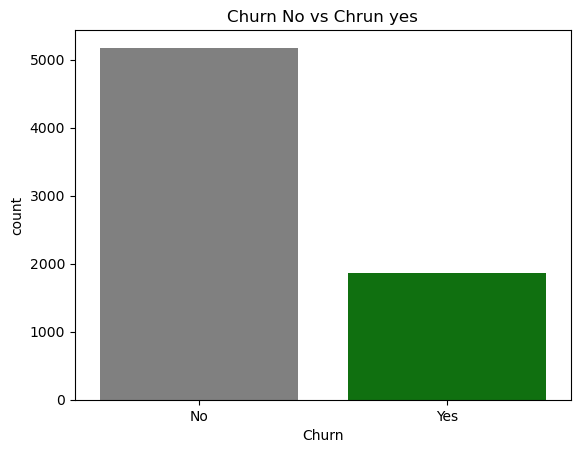

In [29]:
#Exploratory data analysis
sns.countplot(x='Churn',data=data,palette=['gray','green'])
plt.title("Churn No vs Chrun yes")
plt.show()

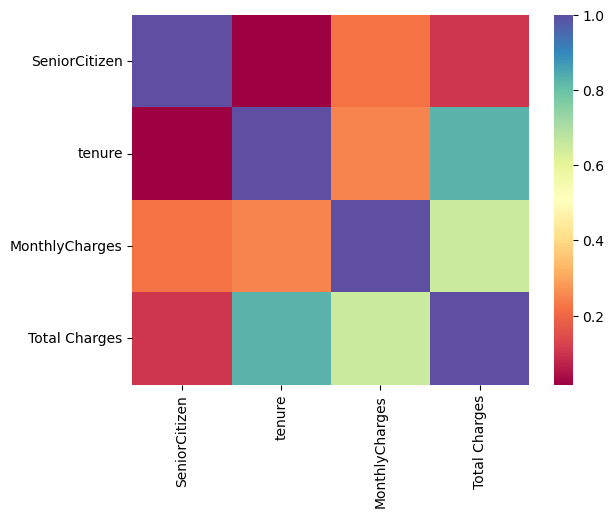

In [13]:
#correlations
corr = data.corr(numeric_only= True)
sns.heatmap(corr,cmap="Spectral")
plt.show()

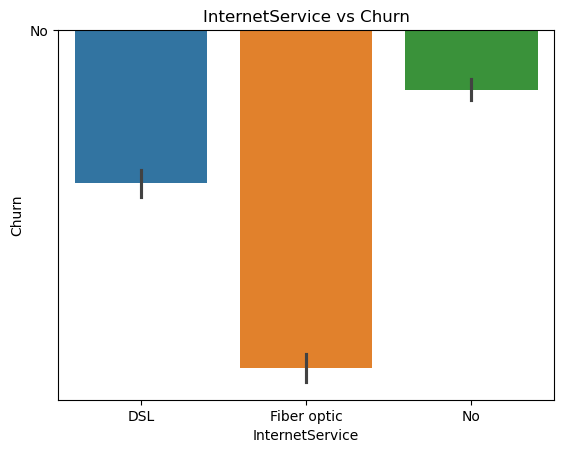

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Total Charges'],
      dtype='object')

In [30]:
#where is the  churn happeing
#internetservive is effecting churn
sns.barplot(x='InternetService',y='Churn',data= data,hue='InternetService')
plt.title('InternetService vs Churn')
plt.show()
data.columns

C:\Users\chara\AppData\Local\Temp\ipykernel_11508\1896666696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OnlineSecurity',y='Churn',data= data,palette=['red','green','gray'])


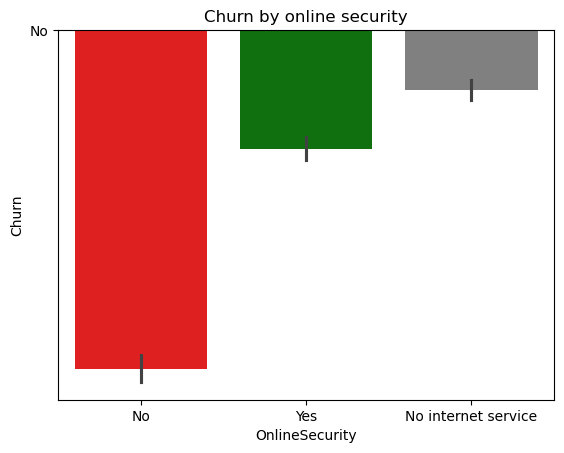

In [31]:
#is online security making customers not to retain
sns.barplot(x='OnlineSecurity',y='Churn',data= data,palette=['red','green','gray'])
plt.title("Churn by online security")
plt.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_11508\449297165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TechSupport',y='Churn',data= data,palette=cor)


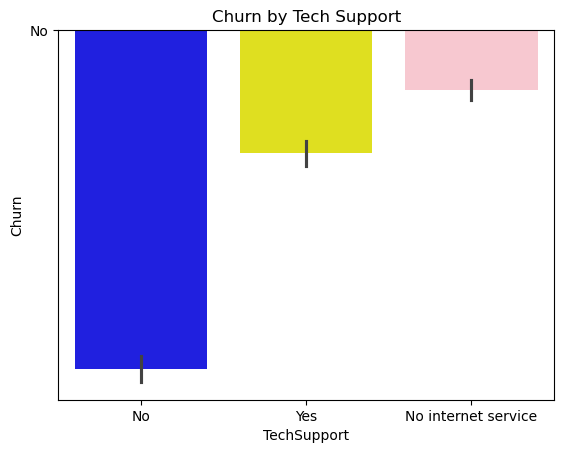

In [34]:

##is tech support  making customers not to retain
cor = ['blue','yellow','pink']
sns.barplot(x='TechSupport',y='Churn',data= data,palette=cor)
plt.title("Churn by Tech Support")
plt.show()

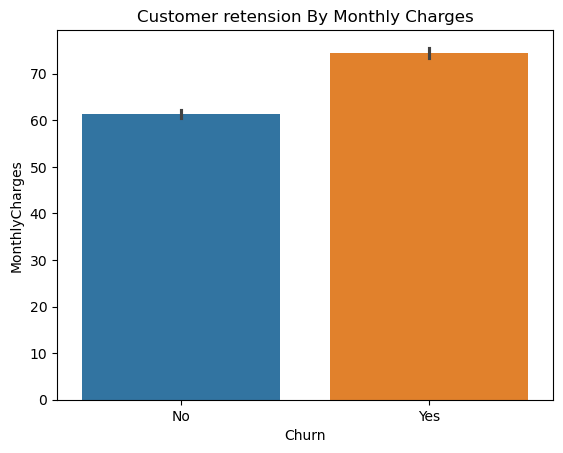

In [16]:
#Do monthly charges afftecting retention
sns.barplot(x='Churn' ,y ='MonthlyCharges',data = data,hue='Churn')
plt.title("Customer retension By Monthly Charges")
plt.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_11508\1668104916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn' ,y ='tenure',data = data,palette=['orange','red'])


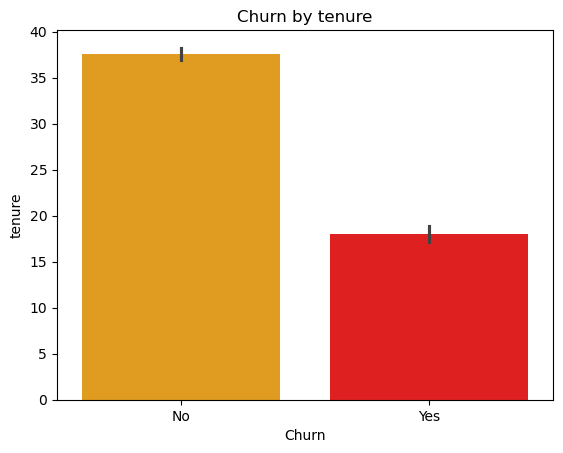

In [17]:
#Does Tenure effets the churn
sns.barplot(x='Churn' ,y ='tenure',data = data,palette=['orange','red'])
plt.title("Churn by tenure")
plt.show()

C:\Users\chara\AppData\Local\Temp\ipykernel_11508\2108561247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract' ,y ='Churn',data = data,palette= x)


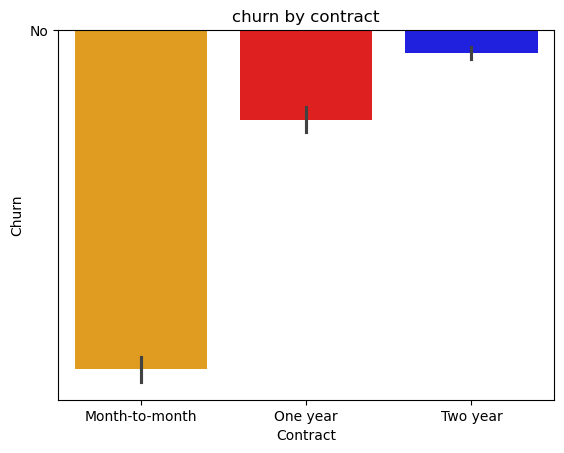

In [35]:

#Does contract effets the churn
x  = ['orange','red','blue']
sns.barplot(x='Contract' ,y ='Churn',data = data,palette= x)
plt.title("churn by contract")
plt.show()

In [26]:
#feature  engineering
#features and targets 
df = data.copy()
X = df.drop('Churn',axis=1)
y= df['Churn']

#feature encoding
X_encoded = pd.get_dummies(X)

#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#define types for pipeline
cat_cols = [
    'gender',
    'SeniorCitizen',     # even though int64, it is categorical (0/1)
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]
num_cols = [
    'tenure',
    'MonthlyCharges',
    'Total Charges']

#standard scaling and one hot coding
preprocessor  = ColumnTransformer([
    ('standardScaler',StandardScaler(),num_cols),
 ('enocder',OneHotEncoder(drop = 'first',handle_unknown='ignore' ),cat_cols)
])

#pipeline
pipeline  = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(n_estimators=100,max_depth = 10,random_state = 42))
])

#fitting
pipeline.fit(X_train,y_train)

#predicting
pred_yy  = pipeline.predict(X_test)


#model evaluation 
print("accuracy-score:",accuracy_score(y_test,pred_yy))
print("Confusion_matrix:",confusion_matrix(y_test,pred_yy))
print("Classification_report:",classification_report(y_test,pred_yy))

accuracy-score: 0.7988641741599621
Confusion_matrix: [[1404  135]
 [ 290  284]]
Classification_report:               precision    recall  f1-score   support

          No       0.83      0.91      0.87      1539
         Yes       0.68      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [25]:
# we are not considering this randonm forest model without pipeline beacause it not generated good results 
#feature  engineering
#features and targets 
df = data.copy()
X = df.drop('Churn',axis=1)
y= df['Churn']

#feature encoding
X_encoded = pd.get_dummies(X)


#train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size=0.3,random_state=42)
scaler  = StandardScaler()

#feature scaling
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


#model selection
rf_model  = RandomForestClassifier(n_estimators=100,max_depth = 10,random_state = 42)

#model training
rf_model.fit(X_train_scaled,y_train)

#prediction
y_pred  = rf_model.predict(X_test_scaled)


#model evaluation 
print("accuracy-score:",accuracy_score(y_test,y_pred))
print("Confusion_matrix:",confusion_matrix(y_test,y_pred))
print("Classification_report:",classification_report(y_test,y_pred))

accuracy-score: 0.7283483199242783
Confusion_matrix: [[1539    0]
 [ 574    0]]
Classification_report:               precision    recall  f1-score   support

          No       0.73      1.00      0.84      1539
         Yes       0.00      0.00      0.00       574

    accuracy                           0.73      2113
   macro avg       0.36      0.50      0.42      2113
weighted avg       0.53      0.73      0.61      2113



C:\Users\chara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chara\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
